
# Machine Learning with Python

Welcome to the **Machine Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in machine learning. You will explore:

1. **Supervised Learning**
    - Regression algorithms
    - Classification algorithms
2. **Unsupervised Learning**
    - Clustering algorithms
    - Dimensionality reduction
3. **Fairness and Interpretability**
    - Interpretable methods
    - Bias evaluation
    
Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing machine learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


## Part3: Fairness in machine learning with the COMPAS dataset
In this project, you will try to tackle an ethic project with machine learning. The goal is to understand the possible biases in the datasets and when creating a machine learning model. The taks will include:  

1. **Import and Understand a Dataset**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Perform classification on a dataset**: Learn to perform a classification on real dataset.
3. **Interpret the model**: Learn to create interpretable representation of your model.
4. **Analayse the possible biases**: Learn to be critical about the model's prediction.


By the end of this project, you'll have a better understanding of the risks related to biases in datasets.

---

## Dataset

This exercise will use the **COMPAS dataset** (https://www.kaggle.com/datasets/danofer/compass/).  
The COMPAS dataset contains data on individuals involved in the criminal justice system, including features like age, race, and criminal history, used to predict recidivism risk scores. It has been widely used to study algorithmic bias in risk prediction models.  

Here, it is given to you in the `compas_binarised.csv` file.  
The code snippet below allows you to load the dataset.

In [9]:
import pandas as pd

# Read the dataset
df = pd.read_csv('compas_binarised.csv')

# Remove rows with missing values
df = df.dropna()

# Remove the 'id' column
df = df.drop(columns=['id'])

## Data visualisation

The description of the dataset is given to you in the code snippets below.

**Your job**:
- Look at the dataset information.
- What can you say about the available features?
- What is the target called?
- Split the dataset into *feature* and *targets*.


### 🔍 1. Analyse des caractéristiques (*features*) disponibles

Le dataset contient des informations à la fois **démographiques** et **judiciaires** sur des individus. Voici une description des principales colonnes :

- `priors_count` : nombre d'antécédents judiciaires (variable quantitative).
- `sex_Female` et `sex_Male` : représentation binaire du sexe à l'aide du **one-hot encoding**.
- `age_cat_25 - 45`, `age_cat_Greater than 45`, `age_cat_Less than 25` : catégories d'âge encodées en binaire.
- `race_African-American`, `race_Asian`, `race_Caucasian`, `race_Hispanic`, `race_Native American`, `race_Other` : appartenance ethnique, également encodée via one-hot encoding.

> ⚠️ On remarque que toutes les variables catégorielles (sexe, âge, race) ont été transformées en variables binaires à l’aide du **one-hot encoding**. Cela permet une meilleure prise en charge par les algorithmes de machine learning.


### 🎯 2. Variable cible (*target*)
La variable cible est :
- **`is_recid`** : Il s'agit d'une variable binaire indiquant si un individu a récidivé (`1`) ou non (`0`).
Cette colonne représente donc l’étiquette à prédire dans un cadre de classification binaire.


In [10]:
# Show the first few rows to check the structure of the data
print(df.head())

   priors_count  is_recid  sex_Female  sex_Male  age_cat_25 - 45  \
0             0         0       False      True            False   
1             0         0       False      True            False   
2             0         1       False      True             True   
3             4         1       False      True            False   
4             4         1       False      True            False   

   age_cat_Greater than 45  age_cat_Less than 25  race_African-American  \
0                     True                 False                  False   
1                     True                 False                  False   
2                    False                 False                   True   
3                    False                  True                   True   
4                    False                  True                   True   

   race_Asian  race_Caucasian  race_Hispanic  race_Native American  race_Other  
0       False           False          False               

In [11]:
# Display the structure of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 10542 entries, 0 to 10541
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   priors_count             10542 non-null  int64
 1   is_recid                 10542 non-null  int64
 2   sex_Female               10542 non-null  bool 
 3   sex_Male                 10542 non-null  bool 
 4   age_cat_25 - 45          10542 non-null  bool 
 5   age_cat_Greater than 45  10542 non-null  bool 
 6   age_cat_Less than 25     10542 non-null  bool 
 7   race_African-American    10542 non-null  bool 
 8   race_Asian               10542 non-null  bool 
 9   race_Caucasian           10542 non-null  bool 
 10  race_Hispanic            10542 non-null  bool 
 11  race_Native American     10542 non-null  bool 
 12  race_Other               10542 non-null  bool 
dtypes: bool(11), int64(2)
memory usage: 360.3 KB


In [12]:
# Display the summary statistics of the dataset
print(df.describe())  

       priors_count      is_recid
count  10542.000000  10542.000000
mean       4.099507      0.473629
std        5.380332      0.499328
min        0.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      0.000000
75%        6.000000      1.000000
max       43.000000      1.000000


In [13]:
# Split data 
X = df.drop(columns=["is_recid"])
y = df["is_recid"]


## Train an SVM classifier

You will start by training a SVM classifier on the COMPAS dataset.

**Your job:**
- Split the dataset between train and test using the holdout method.
- Train a SVM model.
- Print the accuracy of the SVM model.

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"SVM model accuracy: {accuracy:.2f}")

SVM model accuracy: 0.65


## Train a Decision tree classifier and interpret the model

Decision tree are highly interpretable. They can be usefull into knowing which features are relevant in the prediction.

**Your job:**
- Split the dataset between train and test using the holdout method.
- Train a decision tree model and modify the hyperparameters.
- Print the accuracy of the decision tree model.
- Plot the confusion matrix 
- Visualise the tree
    - You can use the **plot_tree method**
    - `plot_tree(model, filled=True, feature_names=features.columns, class_names=['No Recidivism', 'Recidivism'], rounded=True)`
- Conclude about the most important features.

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Train a decision tree
model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
model.fit(X_train, y_train)

y_pred_tree = model.predict(X_test)

tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree model accuracy: {tree_accuracy:.2f}")


Decision Tree model accuracy: 0.66


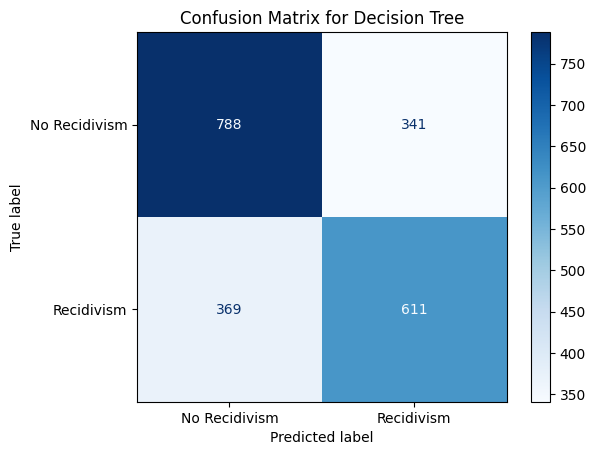

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['No Recidivism', 'Recidivism'], cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

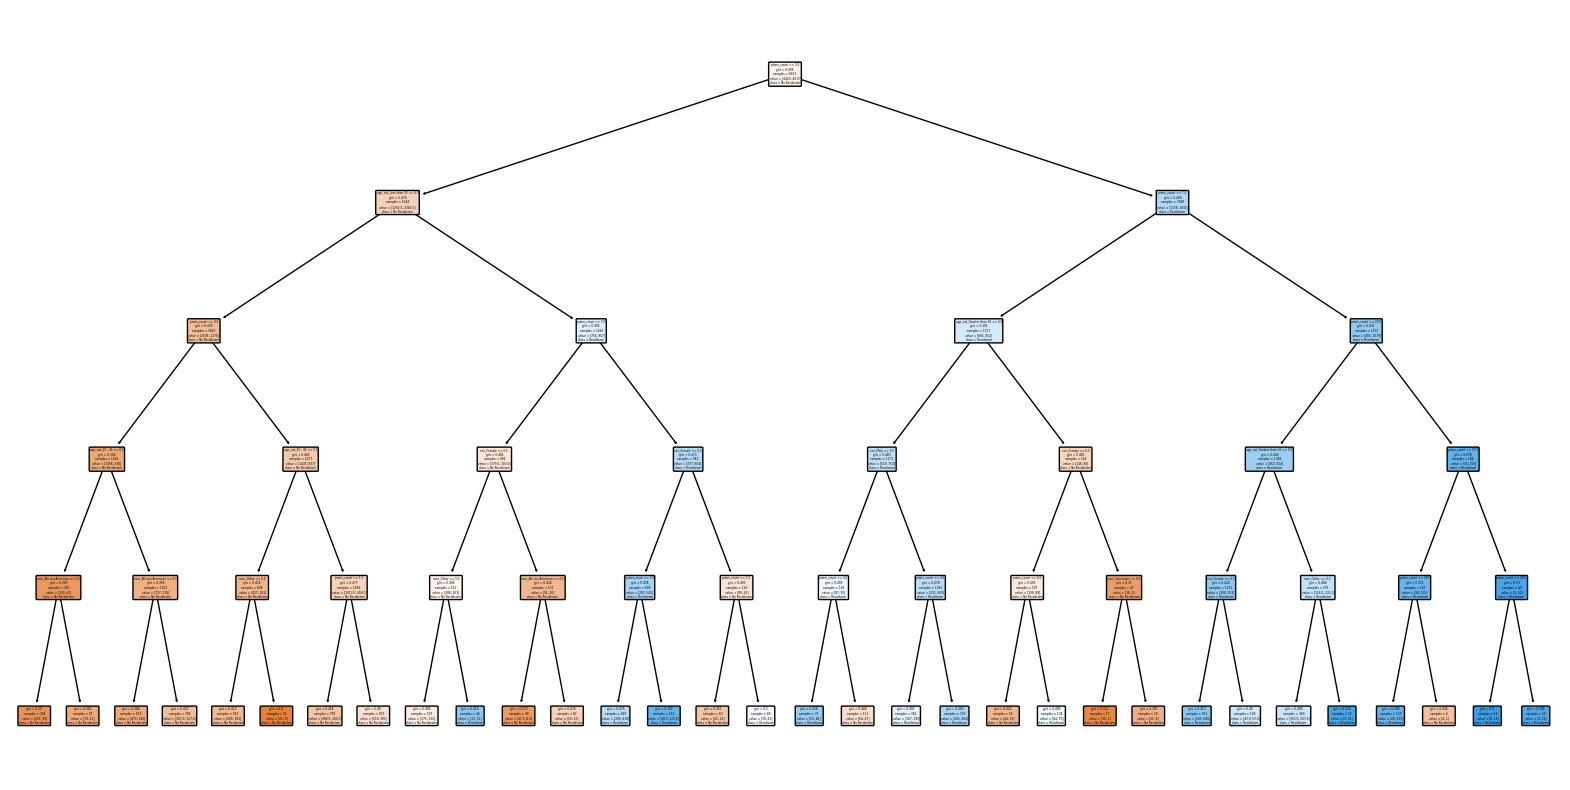

In [20]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No Recidivism', 'Recidivism'], 
          rounded=True)
plt.show()

In [21]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature importances:")
print(feature_importances)

Feature importances:
priors_count               0.625579
age_cat_Less than 25       0.216920
sex_Female                 0.046560
age_cat_Greater than 45    0.038929
age_cat_25 - 45            0.028541
race_Other                 0.023117
race_African-American      0.014731
sex_Male                   0.003887
race_Caucasian             0.001735
race_Asian                 0.000000
race_Hispanic              0.000000
race_Native American       0.000000
dtype: float64


## Evaluate biases

Now that you have evaluated your model on the whole dataset, it is now time to see if there exists a bias in your model.

**Your job:**
- Proposes an evaluation method that evaluates if the model is biased regarding a certain population.
- Is the model fair?
- Conclude on your results.

In [24]:
# recréer une colonne "race" unique
race_columns = [
    'race_African-American', 'race_Asian', 'race_Caucasian', 
    'race_Hispanic', 'race_Native American', 'race_Other'
]

def get_race(row):
    for col in race_columns:
        if row[col] == 1:
            return col.replace('race_', '')
    return 'Unknown'  


df['race'] = df.apply(get_race, axis=1)


In [25]:
from sklearn.metrics import confusion_matrix

# Prédire sur tout X_test
y_pred = model.predict(X_test)

# Créer DataFrame résultats
test_results = X_test.copy()
test_results['true_label'] = y_test
test_results['prediction'] = y_pred

# Ajouter la vraie colonne 'race' depuis df
test_results['race'] = df.loc[X_test.index, 'race']

# Calculer les métriques par race
races = test_results['race'].unique()

for race in races:
    group = test_results[test_results['race'] == race]
    cm = confusion_matrix(group['true_label'], group['prediction'], labels=[0, 1])

    if cm.shape == (2,2):
        tn, fp, fn, tp = cm.ravel()
    else:
        tn = fp = fn = tp = 0

    total = tn + fp + fn + tp
    accuracy = (tp + tn) / total if total != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0

    print(f"Race: {race}")
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  False Positive Rate (FPR): {fpr:.2f}")
    print(f"  False Negative Rate (FNR): {fnr:.2f}")
    print("-"*30)




Race: Caucasian
  Accuracy: 0.65
  False Positive Rate (FPR): 0.23
  False Negative Rate (FNR): 0.53
------------------------------
Race: African-American
  Accuracy: 0.66
  False Positive Rate (FPR): 0.39
  False Negative Rate (FNR): 0.30
------------------------------
Race: Hispanic
  Accuracy: 0.71
  False Positive Rate (FPR): 0.18
  False Negative Rate (FNR): 0.52
------------------------------
Race: Other
  Accuracy: 0.72
  False Positive Rate (FPR): 0.30
  False Negative Rate (FNR): 0.26
------------------------------
Race: Asian
  Accuracy: 1.00
  False Positive Rate (FPR): 0.00
  False Negative Rate (FNR): 0.00
------------------------------
Race: Native American
  Accuracy: 0.88
  False Positive Rate (FPR): 0.00
  False Negative Rate (FNR): 0.20
------------------------------


In [26]:
df.columns

Index(['priors_count', 'is_recid', 'sex_Female', 'sex_Male', 'age_cat_25 - 45',
       'age_cat_Greater than 45', 'age_cat_Less than 25',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'race'],
      dtype='object')

Une bonne méthode pour détecter un biais est de calculer et comparer les performances du modèle (Accuracy, FPR, FNR) séparément pour chaque sous-population (par exemple, chaque "race").
Si on observe des grandes différences, cela signifie que le modèle traite différemment certaines populations, donc est potentiellement biaisé.


African-Americans ont une FPR de 0.39, beaucoup plus haute que les Caucasians (0.23) et Hispanics (0.18).
➔ Ça veut dire que le modèle accuse à tort plus souvent les African-Americans de récidive.
False Negative Rate (FNR) est plus élevé chez Caucasians (0.53) que chez African-Americans (0.30).
➔ Ça veut dire que le modèle rate plus souvent des Caucasians qui récidivent réellement.
Asian a une accuracy parfaite (1.00) mais attention : probablement parce qu'il y a très peu d'exemples dans ce groupe
Les groupes "Hispanic" et "Other" ont des performances assez équilibrées, mais toujours quelques variations.

le modle présente un biais important contre les African-Americans, qui ont :
Un taux de faux positifs (FPR) plus élevé que les autres.
Ce biais peut conduire à des décisions injustes contre eux ..

# The END!

Congratulations!  
You have now completed this course about machine learning!  
You should now have a good understanding of the basic principles of artificial intelligence!  

It is a fine knowledge basis on which you construct yourself. You are now well-prepared to tackle new challenges in machine learning!

If you liked this course, don't hesitate to contact me for other courses:
- **Machine learning:** from supervised to unsupervised, with ethical questionning.
- **Deep Learning:** from the 50's perceptron up to the transformer powerhouse.
- **Reinforcement learning:** learn to create you own unique agent!
- **AI in games:** learn to apply deep learning in video games!

Also, don't hesitate to *star* this repository, it helps me a lot!